In [223]:
library(tidyverse)
library(cowplot)
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




   90%    75%    50%    25%    10% 
13.250 12.895 12.350 11.850 11.456 


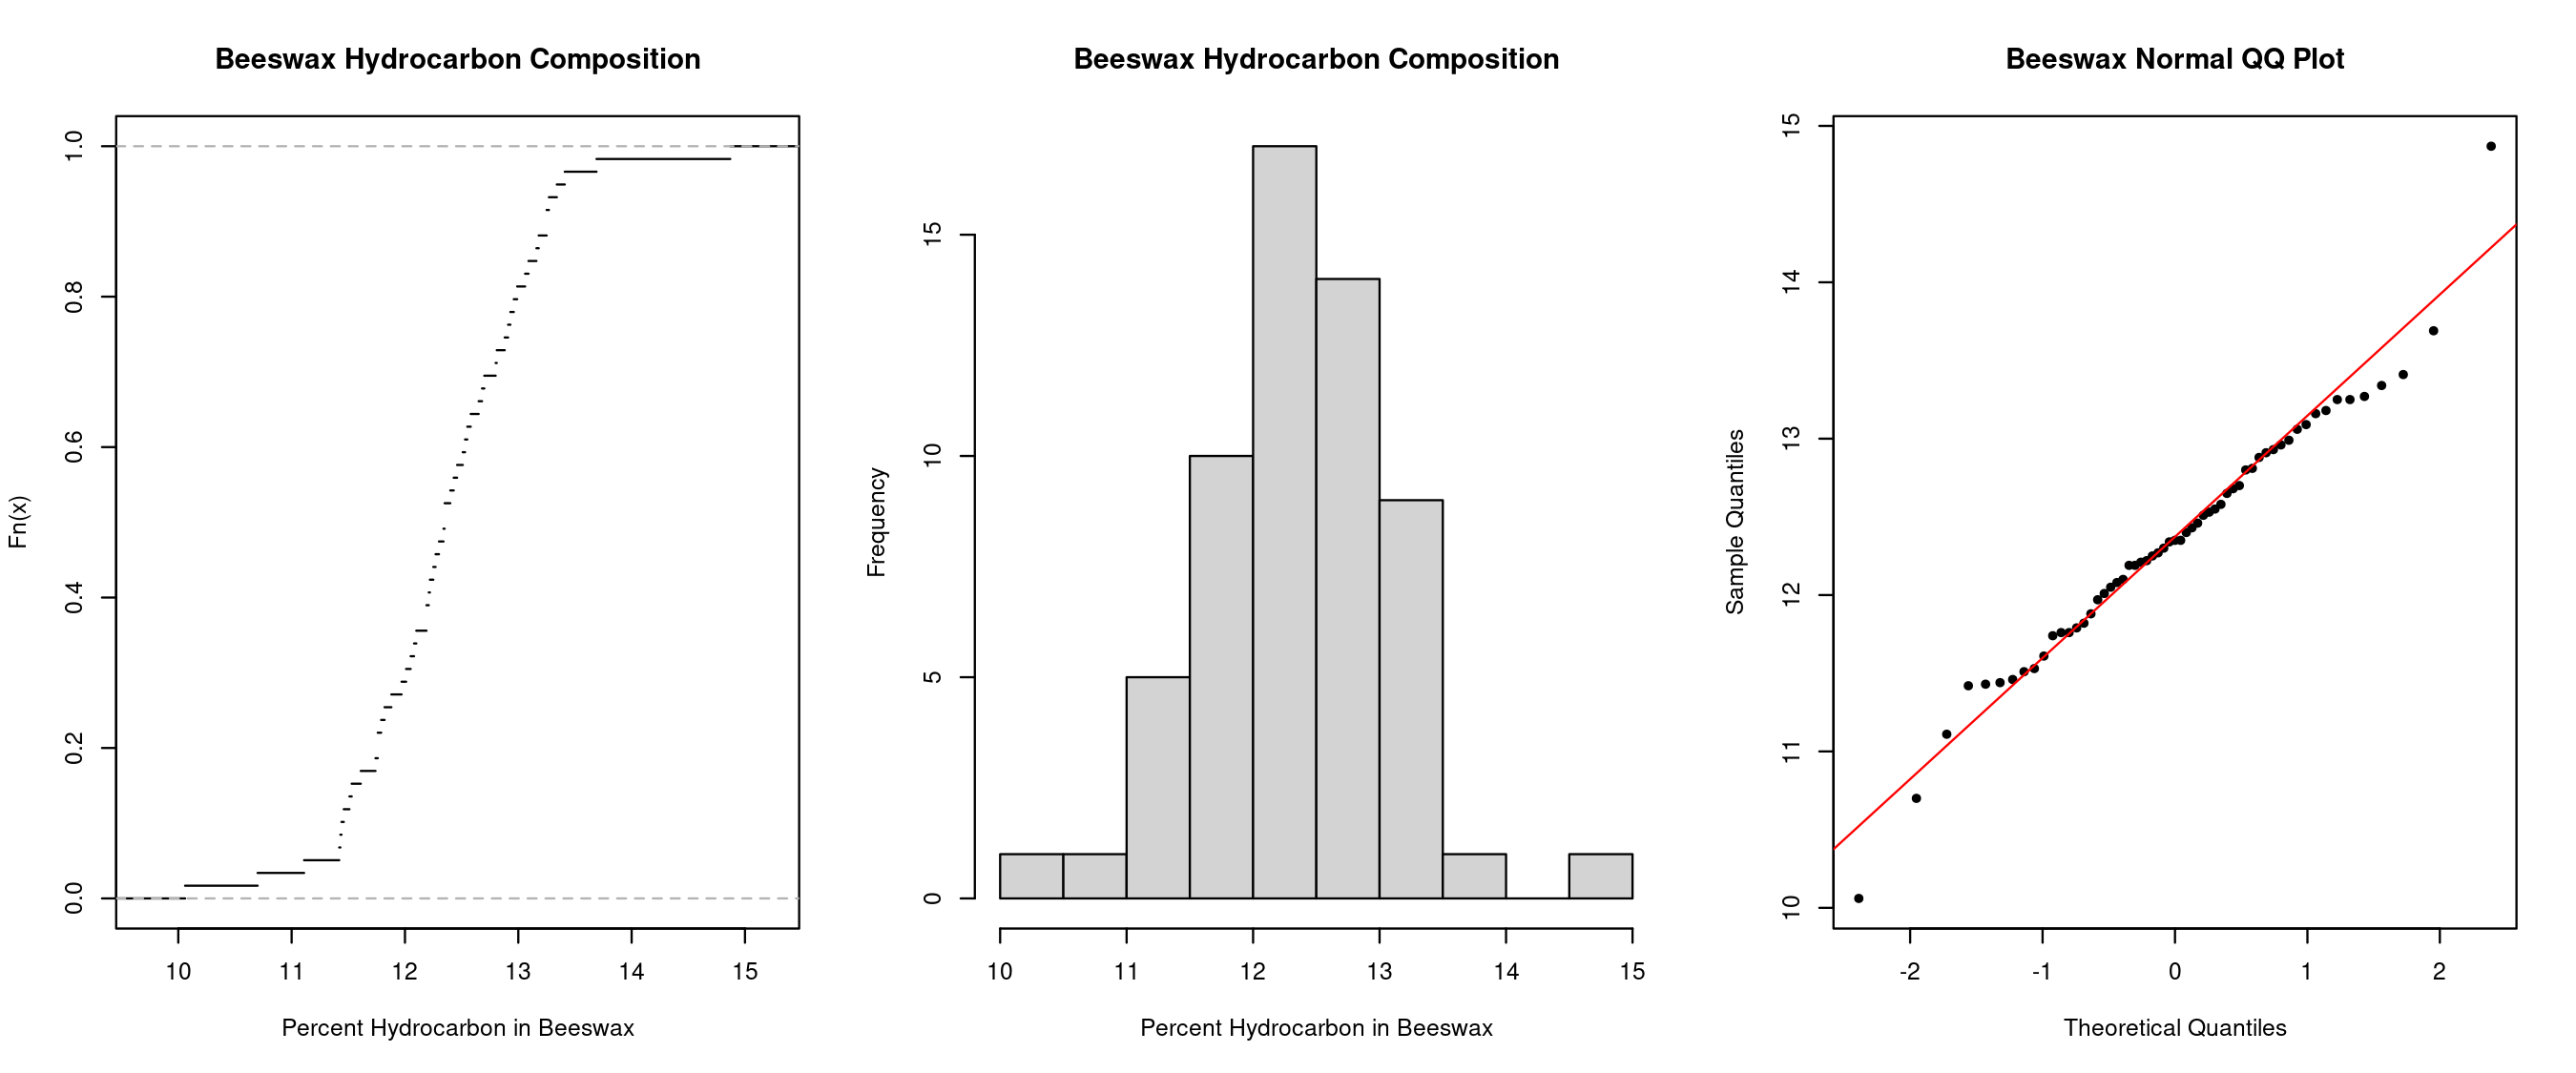

In [48]:
# Problem #4
data <- c(12.05,12.58,10.06,14.87,12.88,10.7,13.34,13.16,12.93,11.76,12.68,13.69,12.3, 
          13.41,11.61,11.44,11.76,12.25,12.43,12.51,12.96,12.27,12.34,12.81,13.18, 
          12.46,11.11,12.19,11.97,12.99,12.53,12.19,11.82,11.46,13.09,12.1,11.42,12.55, 
          12.08,12.4,11.88,13.25,11.51,11.43,12.8,11.79,12.7,13.25,11.53,12.65,13.06, 
          12.21,11.74,12.35,13.27,12.91,12.01,12.22,12.35)

# plots
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 225)

par(mfrow = c(1, 3))

ecdf_plot <- plot(ecdf(data), xlab = "Percent Hydrocarbon in Beeswax", main = "Beeswax Hydrocarbon Composition", pch = ".")
hist_plot <- hist(data, breaks = 12, main = "Beeswax Hydrocarbon Composition", xlab = "Percent Hydrocarbon in Beeswax")
qq_plot <- qqnorm(data, pch = 20, main = "Beeswax Normal QQ Plot")
           qqline(data, col = "red")

# Find Quantiles

print(quantile(data, probs = c(0.9, 0.75, 0.5, 0.25, 0.1)))


── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  DAY = col_double(),
  INTERVAL = col_double(),
  DURATION = col_double()
)




spec_tbl_df [107 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DAY     : num [1:107] 1 1 1 1 1 1 1 1 1 1 ...
 $ INTERVAL: num [1:107] 78 74 68 76 80 84 50 93 55 76 ...
 $ DURATION: num [1:107] 4.4 3.9 4 4 3.5 ...
 - attr(*, "spec")=
  .. cols(
  ..   DAY = col_double(),
  ..   INTERVAL = col_double(),
  ..   DURATION = col_double()
  .. )


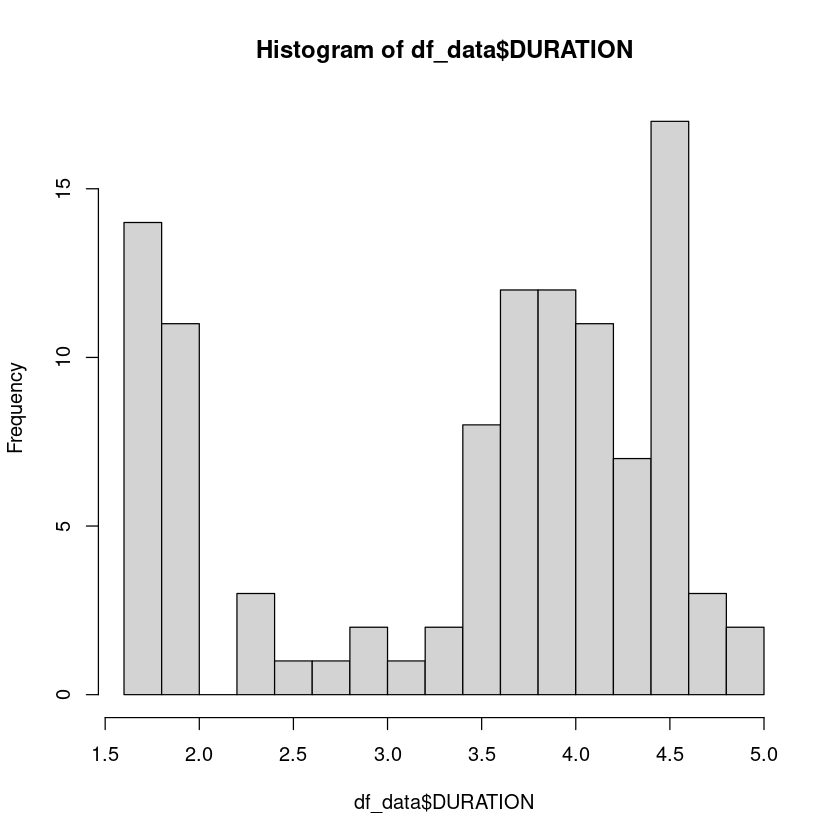

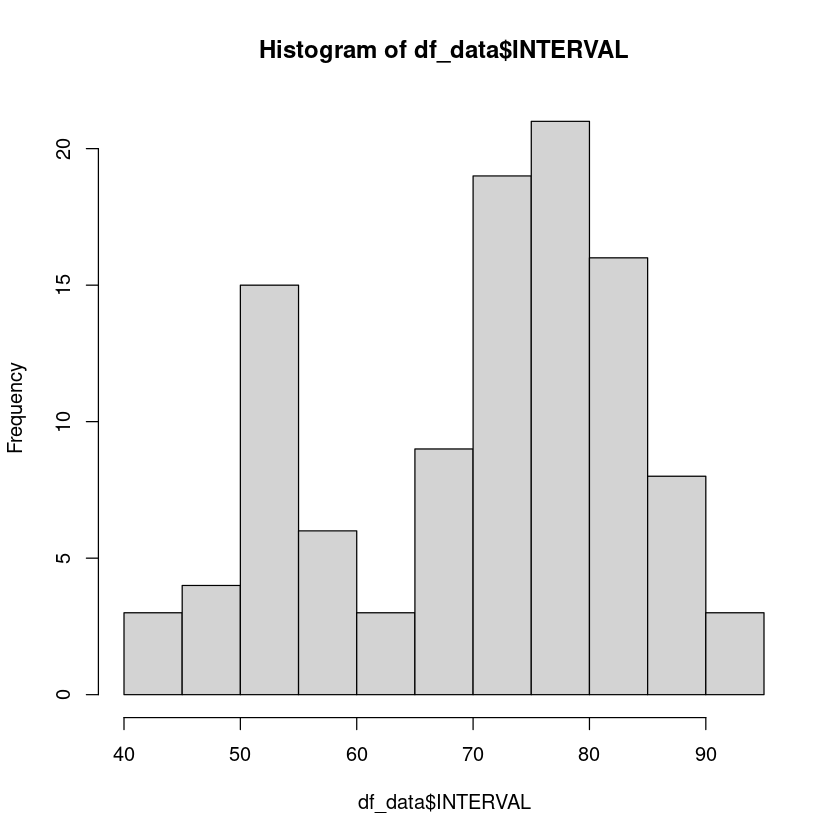

In [41]:
# Problem 5
df_data <- read_csv("oldfaithful.csv")
str(df_data)
hist(df_data$DURATION, breaks = 12)
hist(df_data$INTERVAL, breaks = 15)

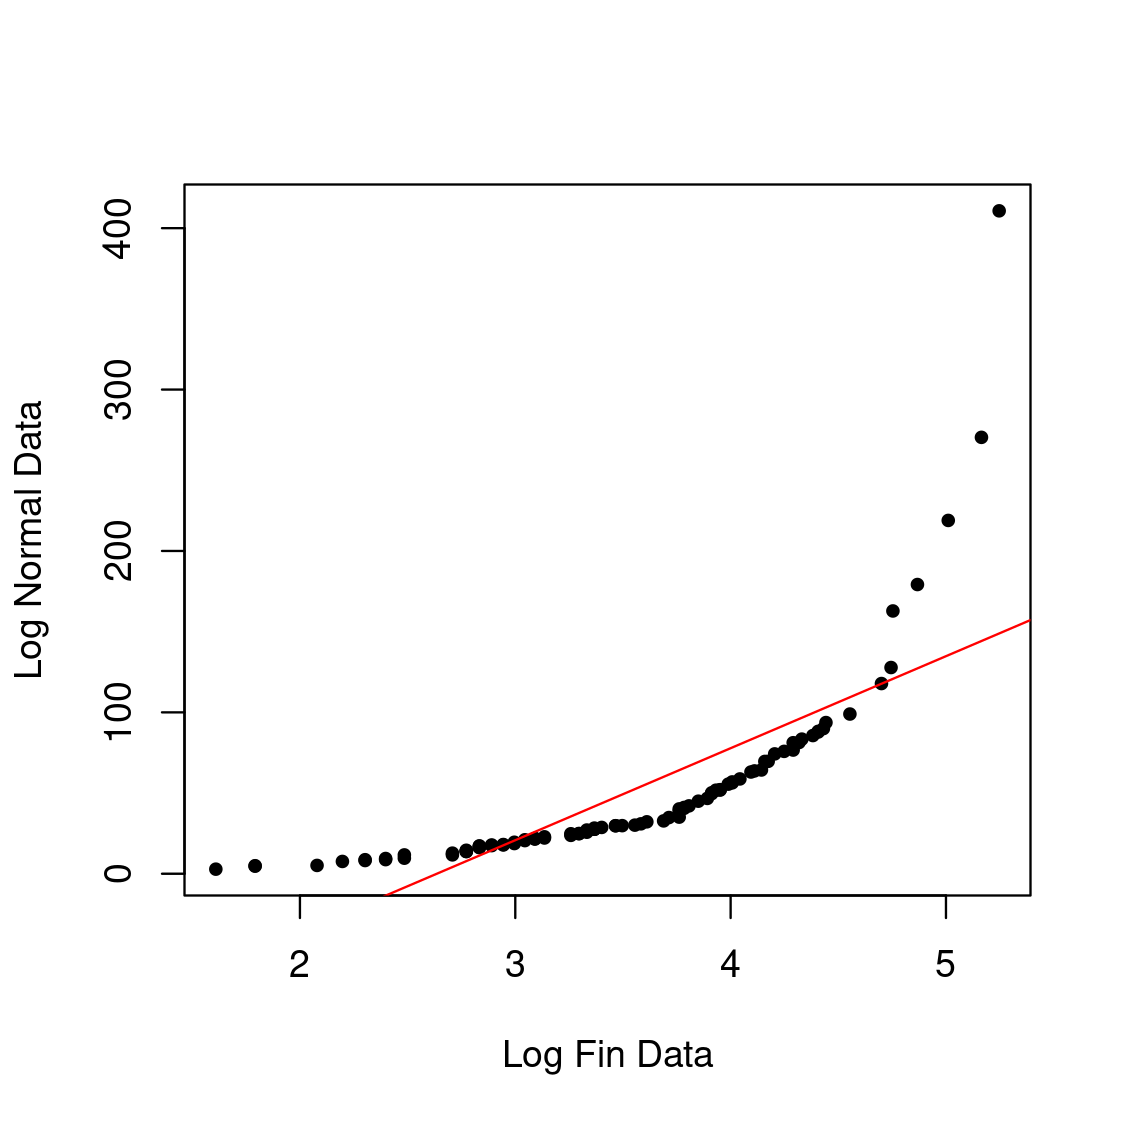

In [64]:
# Problem 3
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 225)

fin_data <- c(110,15,60,54,19,115,73,190,57,43,44,18,37,43,55,19,23,82,175,50,80,65,63, 
              36,16,10,17,52,43,70,22,95,20,41,17,15,12,11,29,29,61,22,40,17,26,30,16, 
              116,28,32,33,29,27,16,55,8,11,49,82,85,20,67,27,44,16,6,35,17,26,32,76, 
              150,21,5,6,51,75,23,29,64,22,47,9,10,28,18,84,52,130,50,45,12,21,73)

fin_data <- sort(log(fin_data))

n_fin <- length(fin_data)

lnorm_data <- sort(rlnorm(n_fin, meanlog = mean(fin_data), sdlog = sqrt(var(fin_data))))

plot(x = fin_data, y = lnorm_data, pch = 20, xlab = "Log Fin Data", ylab = "Log Normal Data")
abline(lm(lnorm_data ~ fin_data), col = "red")

In [151]:
#Problem 2

no_accidents <- c(1735, 1657, 1812, 1962, 1965, 1849, 1755, 1892, 1796, 1900, 1846, 1757)

no_days <- c(31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

In [171]:
df_accident <- tibble(month.name, no_accidents, no_days)
colnames(df_accident) <- c("Month", "Observed", "Number of days/Month")

df_accident["daily_ave"] <- df_accident[, 2] / df_accident[, 3]

ave_day <- sum(df_accident["Observed"]) / 365

df_accident["daily_ave_delta"] <- df_accident[, 4] - ave_day

df_accident["Expected"] <- round(ave_day * df_accident[, 3])

df_accident["Observed - Expected"] <- df_accident["Observed"] - df_accident["Expected"]

df_accident["Probs"] <- df_accident["Observed - Expected"]^2 / sum(df_accident["Observed"])

df_accident

Month,Observed,Number of days/Month,daily_ave,daily_ave_delta,Expected,Observed - Expected,Probs
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
January,1735,31,55.96774,-4.1034909,1862,-127,0.735610691
February,1657,28,59.17857,-0.8926614,1682,-25,0.028504971
March,1812,31,58.45161,-1.6196200,1862,-50,0.114019885
April,1962,30,65.40000,5.3287671,1802,160,1.167563623
May,1965,31,63.38710,3.3158639,1862,103,0.483854784
June,1849,30,61.63333,1.5621005,1802,47,0.100747970
July,1755,31,56.61290,-3.4583297,1862,-107,0.522165466
August,1892,31,61.03226,0.9610252,1862,30,0.041047159
September,1796,30,59.86667,-0.2045662,1802,-6,0.001641886


In [190]:
X_2 = sum(df_accident["Probs"])
print(X_2)
qt(0.95, 12 - 1 - 1)

#We reject the null hypothesis because the observed test statstic is greater than the calculated value at a alpha level of 0.05

[1] 3.852139


[1] 1.812461

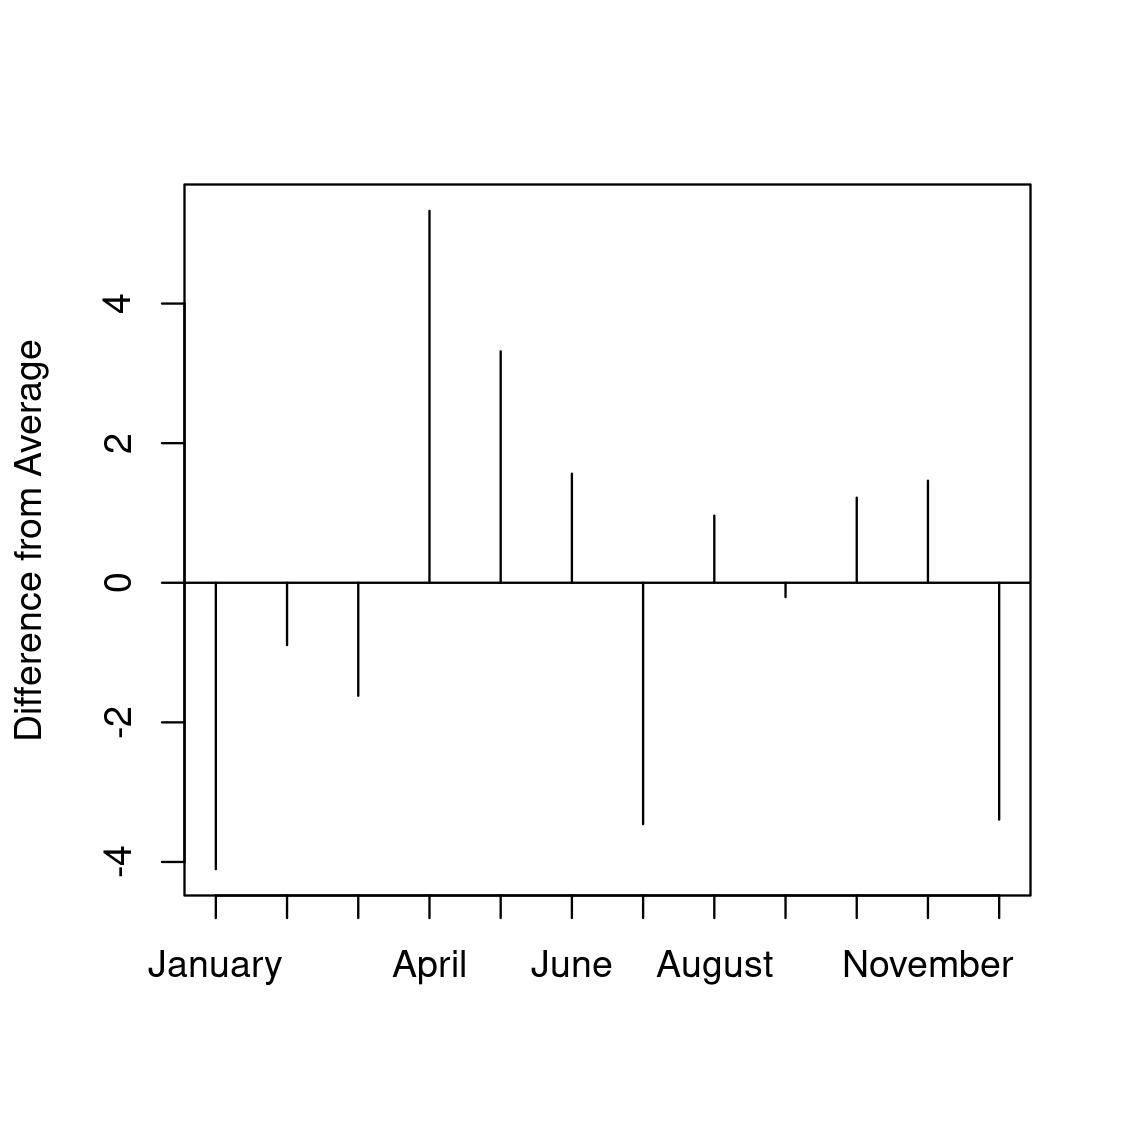

In [169]:
plot(df_accident$daily_ave_delta, type = "h", xaxt = "n", xlab = "", ylab = "Difference from Average")
axis(1, at = 1:12, labels = df_accident$Month)
abline(h = 0)

Warning message:
“Removed 438 rows containing missing values (position_stack).”
Warning message:
“Removed 247 rows containing missing values (position_stack).”
Warning message:
“Removed 247 rows containing missing values (position_stack).”


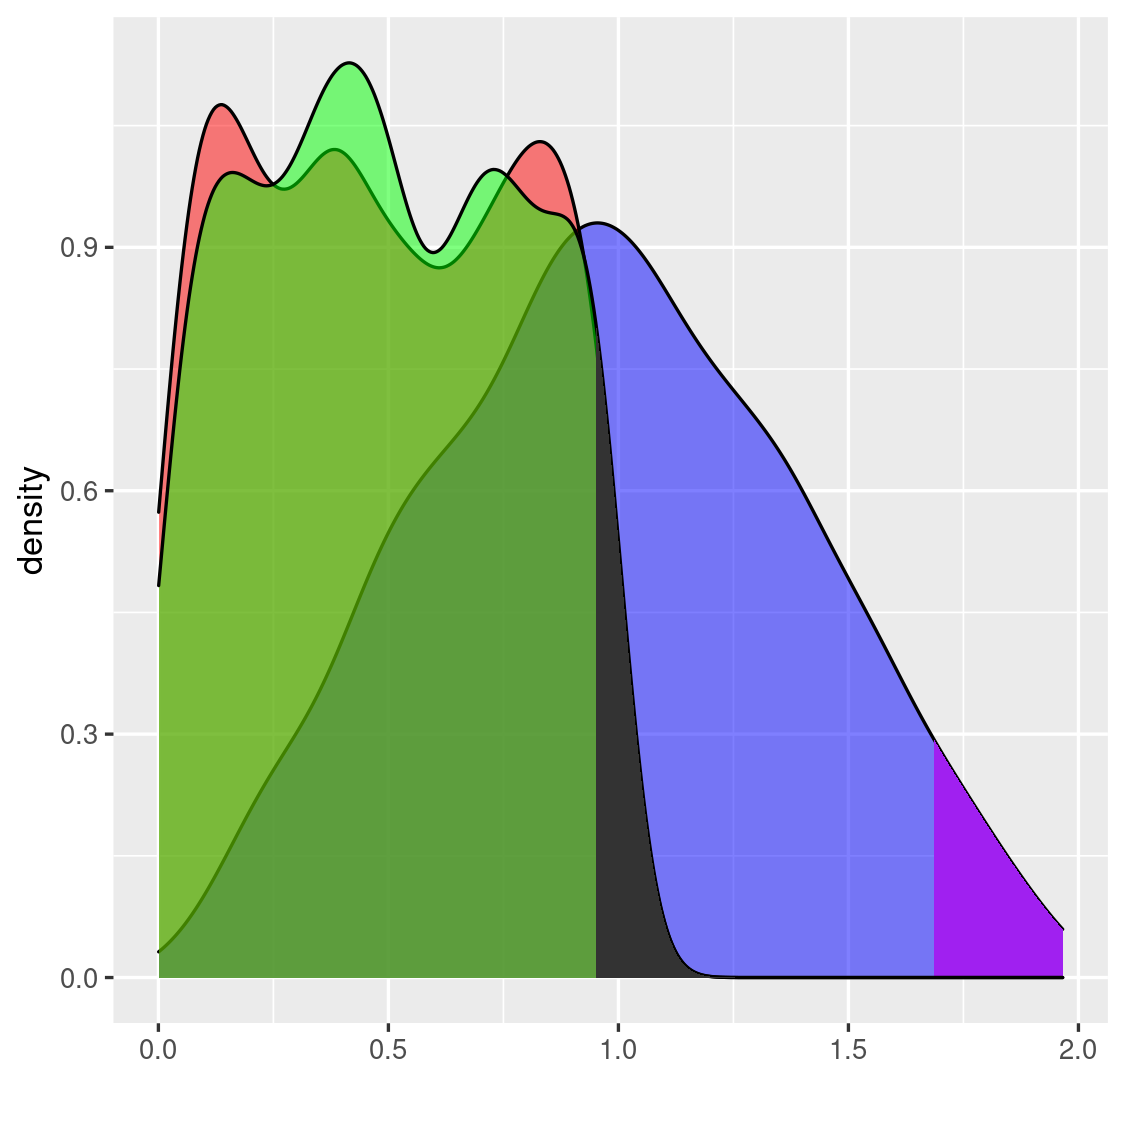

In [283]:
# Problem 1
# a
set.seed(1)

theta_0 <- 0

alpha <- 0.05

Y1 <- runif(1000, theta_0, theta_0 + 1)
#Y1 <- seq(theta_0, theta_0 + 1, 0.01)
Y2 <- runif(1000, theta_0, theta_0 + 1)

Y3 <- Y1 + Y2

df_Y <- tibble(Y1, Y2, Y3)

ggplot(data = df_Y) + geom_density(aes(Y3), fill = "blue", alpha = 0.5) + geom_area(
    aes(x = stage(Y3, after_stat = oob_censor(x, c(1.684, 2)))),
    stat = "density", fill = "purple"
  ) + geom_density(aes(Y2), fill = "red", alpha = 0.5) + geom_area(
    aes(x = stage(Y2, after_stat = oob_censor(x, (1 - alpha)))),
    stat = "density"
  ) + geom_density(aes(Y1), fill = "green", alpha = 0.5) + geom_area(
    aes(x = stage(Y1, after_stat = oob_censor(x, (1 - alpha)))),
    stat = "density"
  ) + xlab("")

Warning message:
“Removed 333 rows containing missing values (position_stack).”
Warning message:
“Removed 350 rows containing missing values (position_stack).”
Warning message:
“Removed 333 rows containing missing values (position_stack).”
Warning message:
“Removed 350 rows containing missing values (position_stack).”


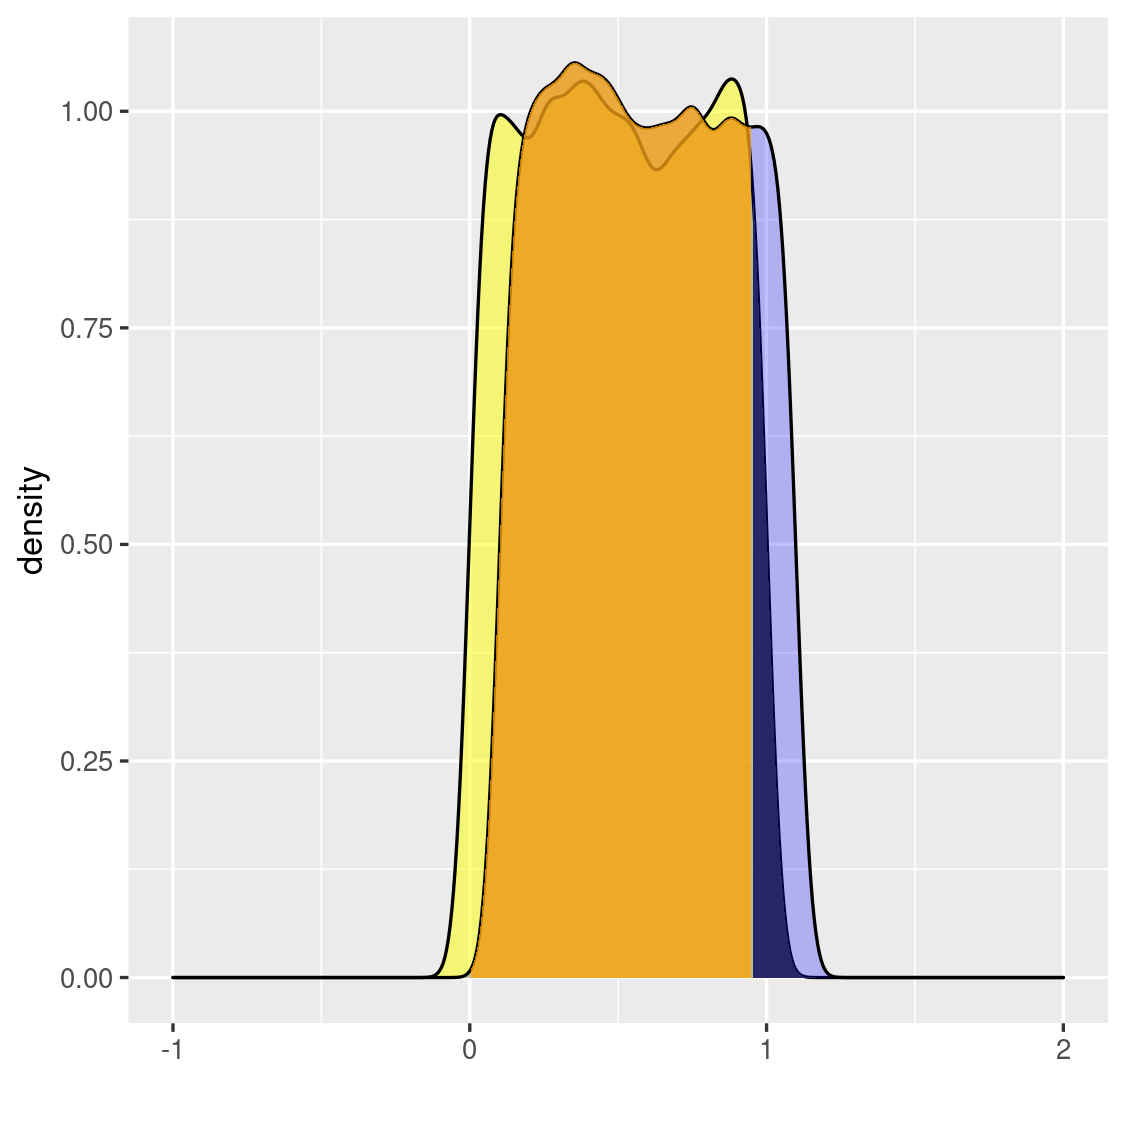

Warning message:
“Removed 333 rows containing missing values (position_stack).”
Warning message:
“Removed 350 rows containing missing values (position_stack).”


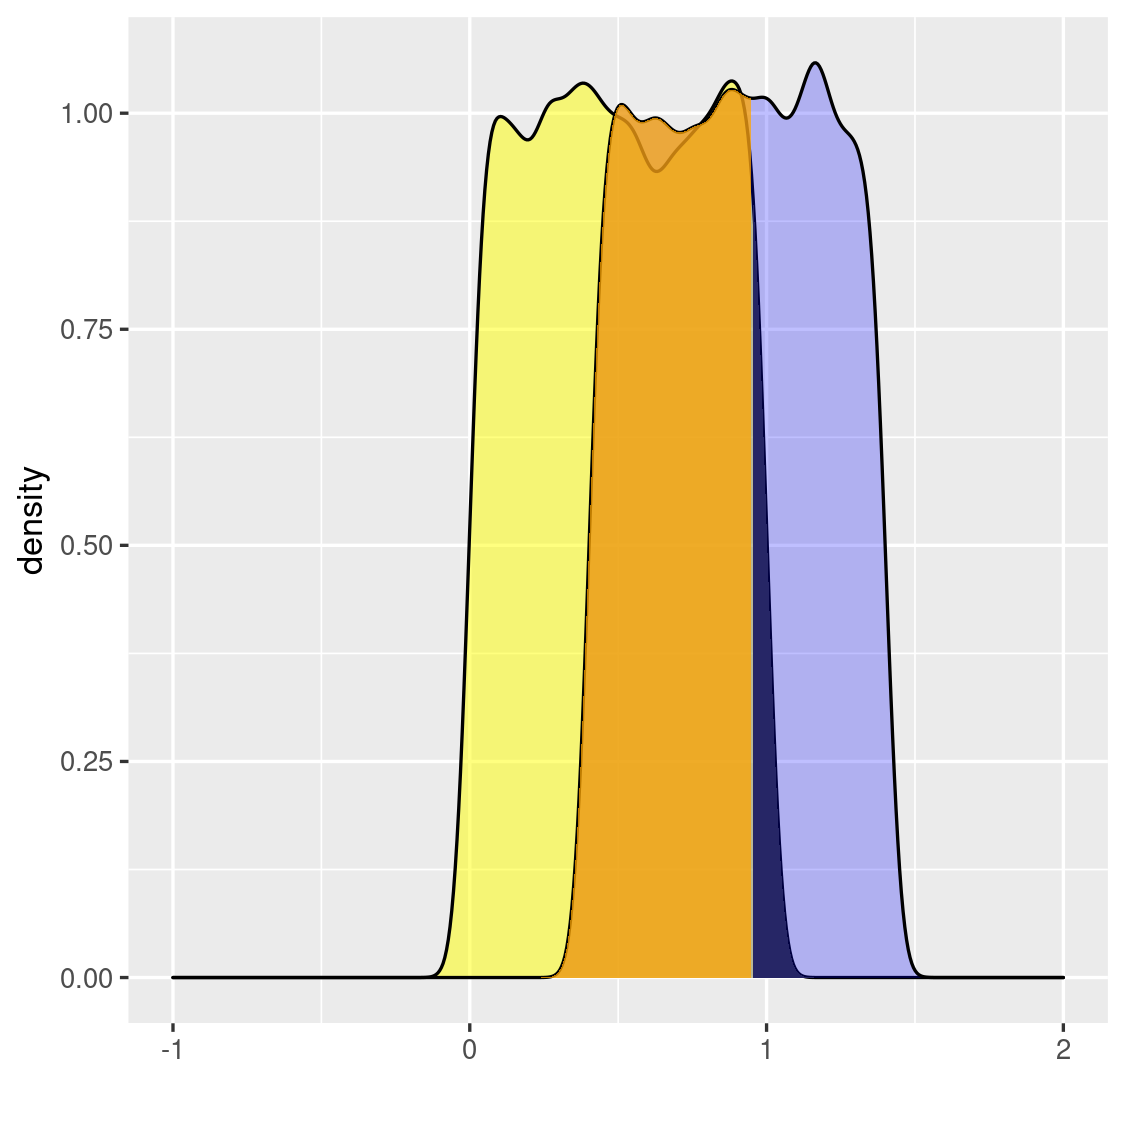

Warning message:
“Removed 333 rows containing missing values (position_stack).”
Warning message:
“Removed 350 rows containing missing values (position_stack).”


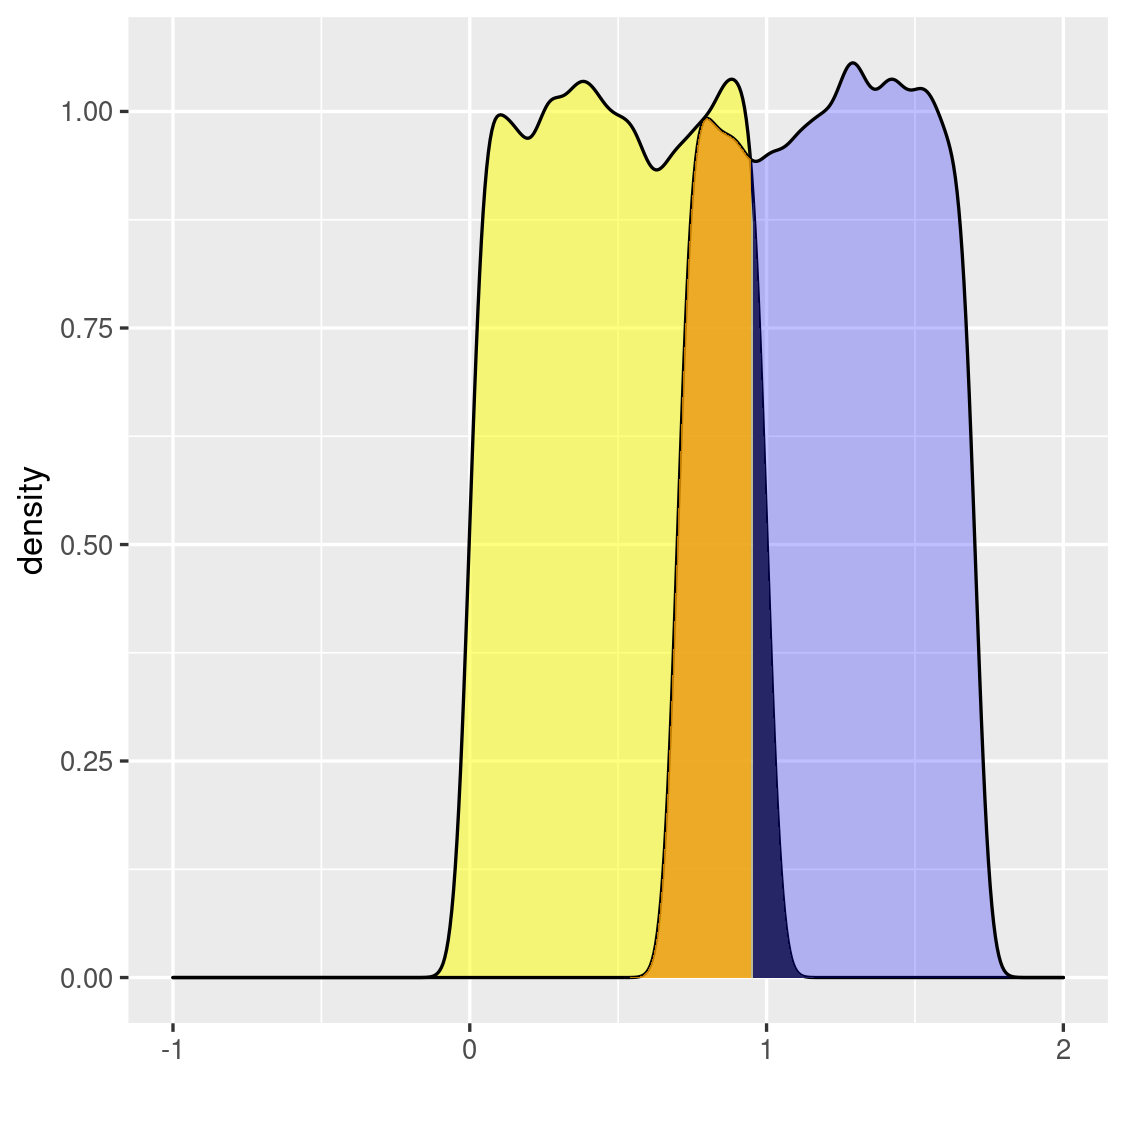

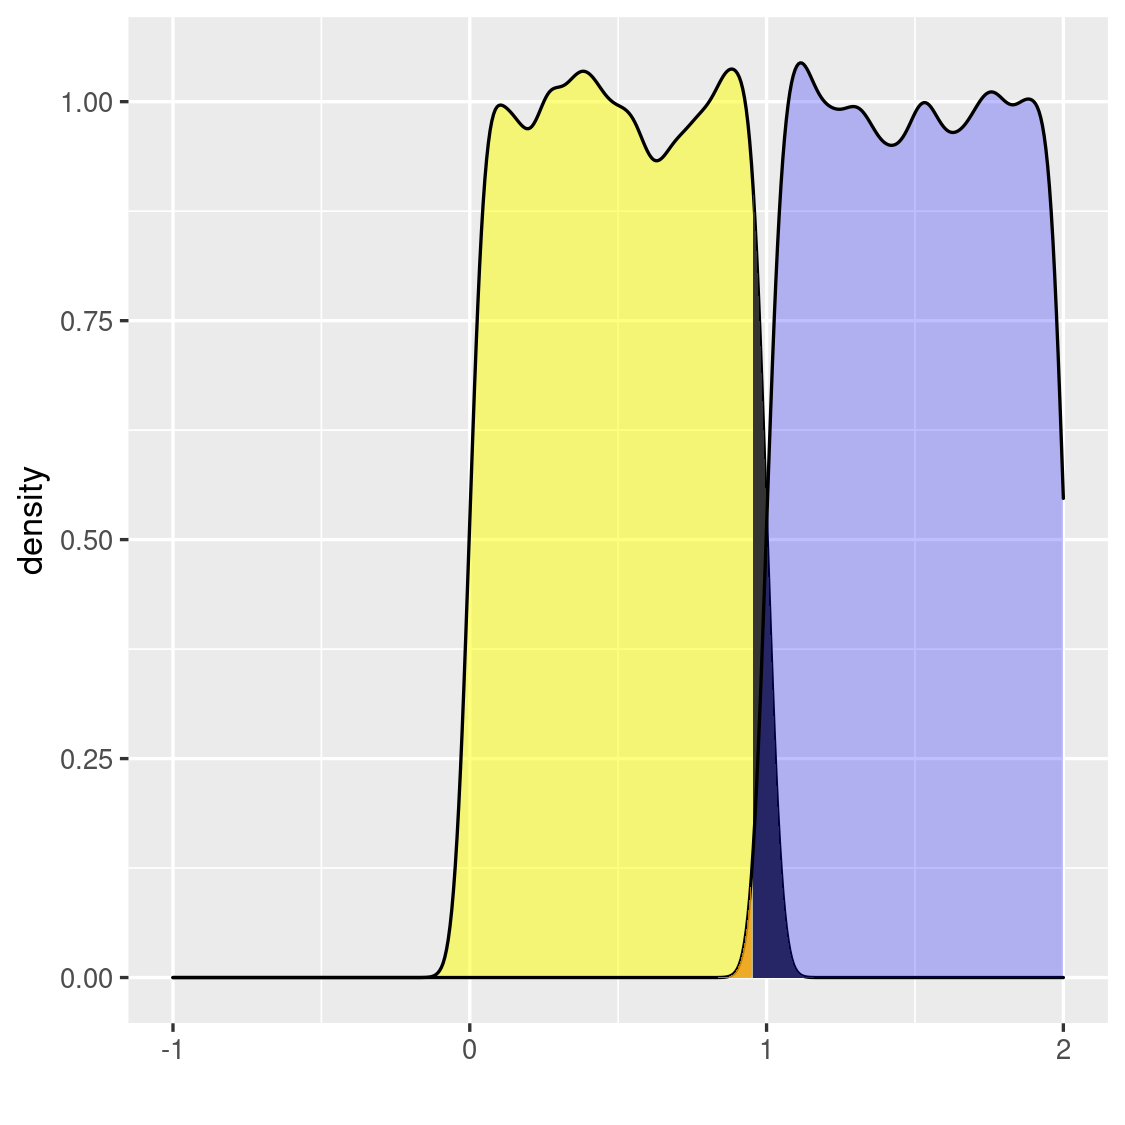

In [288]:
set.seed(1)

theta_0 <- 0
theta_a <- c(0.1, 0.4, 0.7, 1)

alpha <- 0.05

Y1 <- runif(10000, theta_0, theta_0 + 1)
Y2 <- runif(10000, theta_0, theta_0 + 1)

Y3 <- Y1 + Y2

for (i in 1:4){
    YA <- runif(10000, theta_a[i], theta_a[i] + 1)
    df_Y <- tibble(Y1, Y2, Y3, YA)
    
    plot_ <-
    ggplot(data = df_Y) + 
    geom_density(aes(Y1), fill = "yellow", alpha = 0.5) + 
    geom_area(
    aes(x = stage(Y1, 
                  after_stat = oob_censor(x, (1 - alpha)))),
        stat = "density") + 
    
    geom_density(aes(YA), fill = "blue", alpha = 0.25) + 
    geom_area(
    aes(x = stage(YA, after_stat = oob_censor(x, c(0, (1 - alpha))))),
    stat = "density", fill = "orange", alpha = 0.75) + xlab("") + xlim(-1, 2)
    
    print(plot_)
    }

Warning message:
“Removed 229 rows containing missing values (position_stack).”
Warning message:
“Removed 369 rows containing missing values (position_stack).”
Warning message:
“Removed 229 rows containing missing values (position_stack).”
Warning message:
“Removed 369 rows containing missing values (position_stack).”


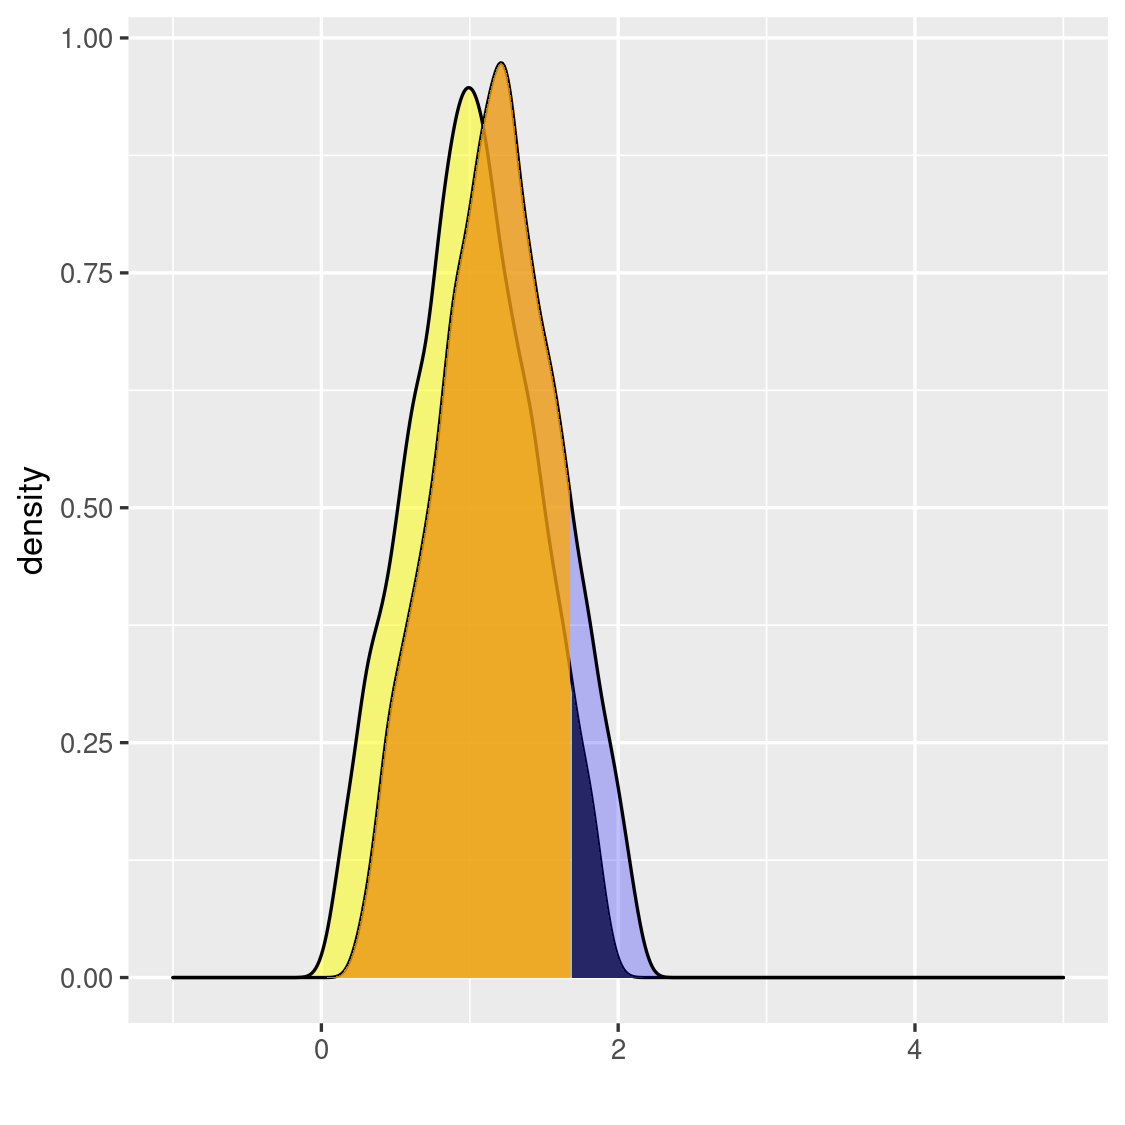

Warning message:
“Removed 229 rows containing missing values (position_stack).”
Warning message:
“Removed 369 rows containing missing values (position_stack).”


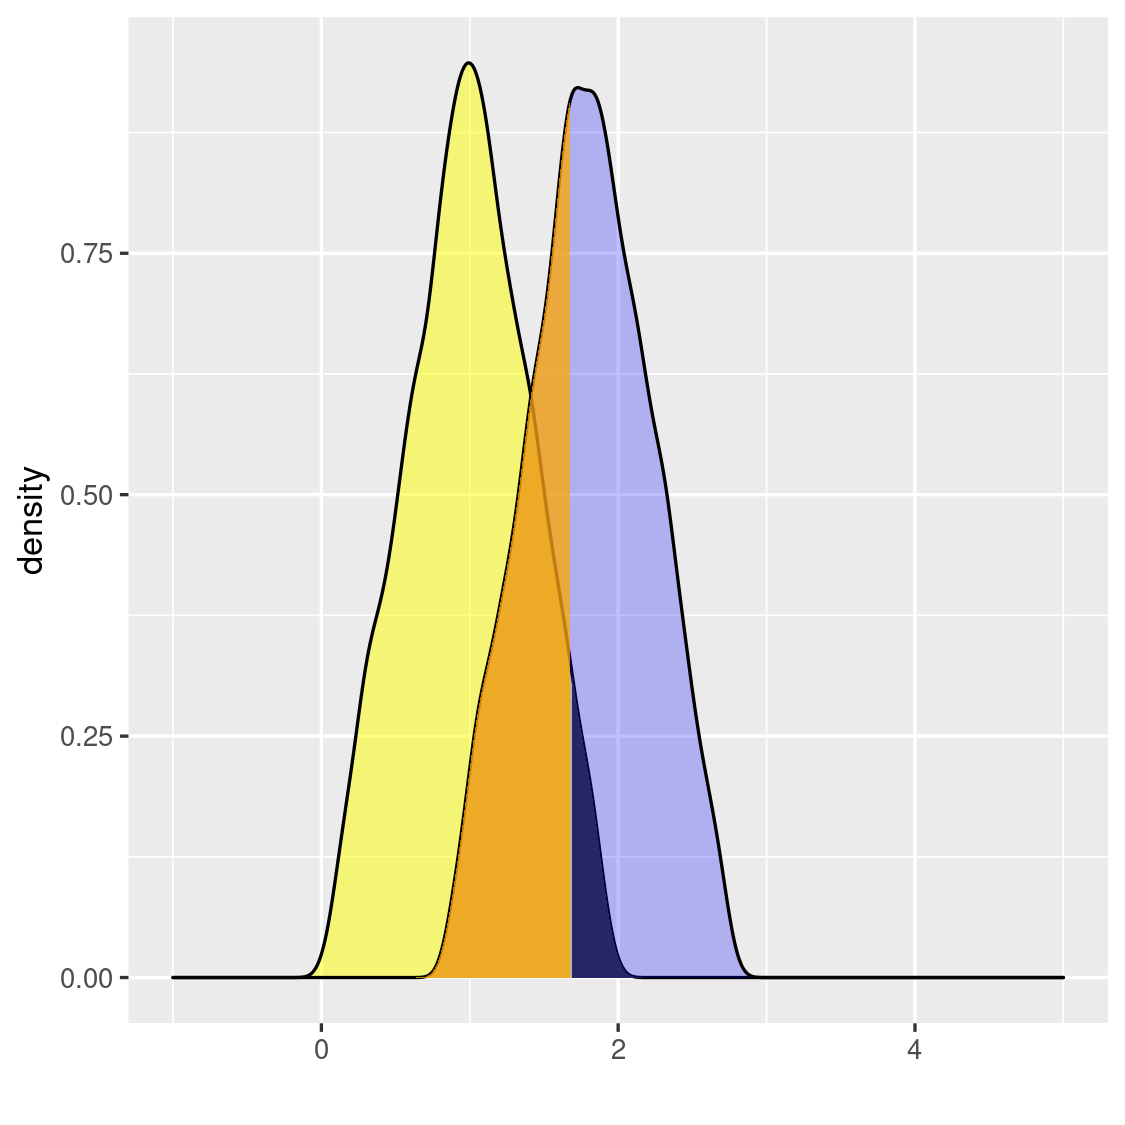

Warning message:
“Removed 229 rows containing missing values (position_stack).”
Warning message:
“Removed 369 rows containing missing values (position_stack).”


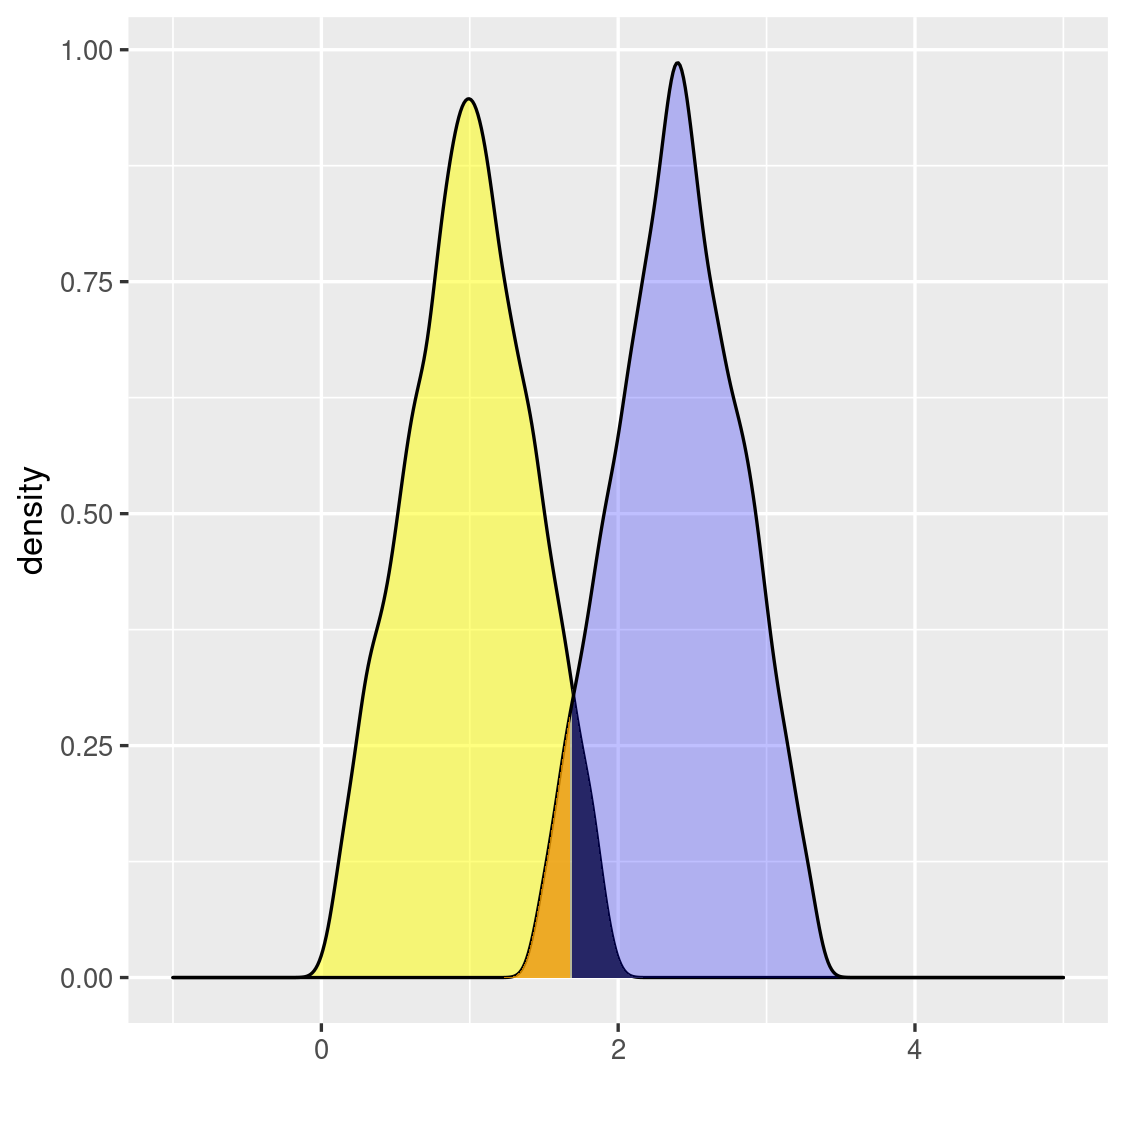

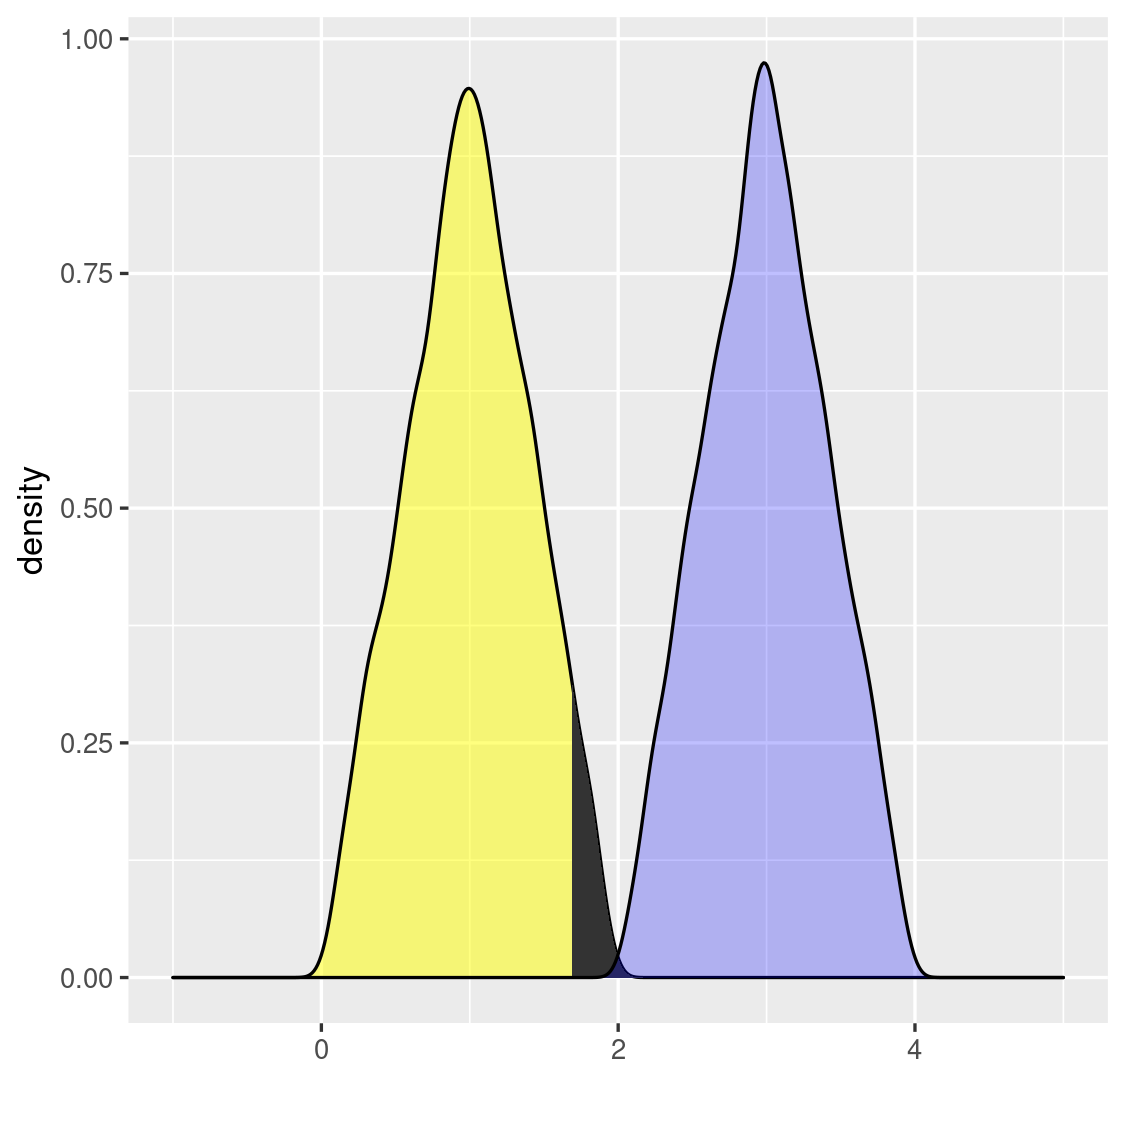

In [301]:
set.seed(1)

theta_0 <- 0
theta_a <- c(0.1, 0.4, 0.7, 1)

c <- 1.684

Y1 <- runif(10000, theta_0, theta_0 + 1)
Y2 <- runif(10000, theta_0, theta_0 + 1)

Y3 <- Y1 + Y2

for (i in 1:4){
    YA1 <- runif(10000, theta_a[i], theta_a[i] + 1)
    YA2 <- runif(10000, theta_a[i], theta_a[i] + 1)

    YA <- YA1 + YA2
    df_Y <- tibble(Y1, Y2, Y3, YA)
    
    plot_ <-
    ggplot(data = df_Y) + 
    geom_density(aes(Y3), fill = "yellow", alpha = 0.5) + 
    geom_area(
        
    aes(x = stage(Y3, 
                  after_stat = oob_censor(x, c))),
                  stat = "density") + 
    
    geom_density(aes(YA), fill = "blue", alpha = 0.25) + 
    geom_area(
        aes(x = stage(YA, after_stat = oob_censor(x, c(0, c))
                     )
           ), 
                      stat = "density", 
            fill = "orange", 
            alpha = 0.75) + 
        xlab("") + xlim(-1, 5)
    
    print(plot_)
    }

In [309]:
for (i in 1:4){
    YA1 <- runif(10000, theta_a[i], theta_a[i] + 1)
    YA2 <- runif(10000, theta_a[i], theta_a[i] + 1)
    YA <- YA1 + YA2
    print(c(min(YA), max(YA), max(YA) - min(YA)))
    }

[1] 0.2133226 2.1762952 1.9629727
[1] 0.8193458 2.7883066 1.9689608
[1] 1.421376 3.382154 1.960778
[1] 2.009329 3.983837 1.974508


In [305]:
0.9^2

[1] 0.81

In [320]:
1 - 0.5*(1.684 - 0.8)^2


[1] 0.609272

In [316]:
0.5*(2.2 - 1.684)^2

[1] 0.133128